In [16]:
!pwd

/home/train51/AITP2020-DS-Challenge/code


In [59]:
import os
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
os.environ['MKL_NUM_THREADS'] = '24'

# Data

In [5]:
trees = pd.read_feather('../data/TREE.feather')

In [6]:
trees.head()

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,CORE_LENGTH_PNWRS,CULTURALLY_KILLED_PNWRS,DIA_EST_PNWRS,GST_PNWRS,INC10YR_PNWRS,INC5YRHT_PNWRS,INC5YR_PNWRS,RING_COUNT_INNER_2INCHES_PNWRS,RING_COUNT_PNWRS,SNAG_DIS_CD_PNWRS
0,157582304010854,157499420010854,NaN,1972,1,1,3,90001,101,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157582305010854,157499420010854,NaN,1972,1,1,3,90001,101,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157582306010854,157499420010854,NaN,1972,1,1,3,90001,101,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157582307010854,157499420010854,NaN,1972,1,1,3,90001,101,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157582308010854,157499420010854,NaN,1972,1,1,3,90001,101,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
plots = pd.read_feather('../data/PLOT.feather')
plots.head()

,CN,SRV_CN,CTY_CN,PREV_PLT_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,PLOT_STATUS_CD,...,MANUAL_NERS,MANUAL_RMRS,PAC_ISLAND_PNWRS,PLOT_SEASON_NERS,PRECIPITATION,PREV_MICROPLOT_LOC_RMRS,PREV_PLOT_STATUS_CD_RMRS,REUSECD1,REUSECD2,REUSECD3
0,43294882010478,43012523010478,379010478,NaN,2000,1,3,5,61,1.0,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
1,43579103010478,43012523010478,433010478,NaN,2000,1,3,113,76,1.0,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
2,43579597010478,43012523010478,433010478,NaN,2000,1,3,113,49,1.0,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
3,43476273010478,43012523010478,421010478,NaN,2000,1,6,89,86,1.0,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
4,47436461010478,43012523010478,421010478,NaN,2000,1,6,89,34,1.0,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN


In [8]:
species = pd.read_feather('../data/SPECIES.feather')
species.head()

,SPCD,COMMON_NAME,GENUS,SPECIES,VARIETY,SUBSPECIES,SPECIES_SYMBOL,E_SPGRPCD,W_SPGRPCD,C_SPGRPCD,...,STANDING_DEAD_DECAY_RATIO3,STANDING_DEAD_DECAY_RATIO4,STANDING_DEAD_DECAY_RATIO5,CREATED_BY,CREATED_DATE,CREATED_IN_INSTANCE,MODIFIED_BY,MODIFIED_DATE,MODIFIED_IN_INSTANCE,DRYWT_TO_GREENWT_CONVERSION
0,896,Java plum,Syzygium,cumini,None,None,SYCU,43,47,NaN,...,0.647,0.541,0.541,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.758474
1,897,tamarind,Tamarindus,indica,None,None,TAIN2,43,47,54.0,...,0.647,0.541,0.541,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.758474
2,901,black locust,Robinia,pseudoacacia,None,None,ROPS,42,47,NaN,...,0.618,0.525,0.525,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.437434
3,902,New Mexico locust,Robinia,neomexicana,None,None,RONE,48,48,NaN,...,0.618,0.525,0.525,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.439062
4,906,"Everglades palm, paurotis-palm",Acoelorraphe,wrightii,None,None,ACWR4,43,47,NaN,...,0.647,0.541,0.541,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.758474


Stage 1: Data Extraction

In [26]:
# trees.astype(dtype={"CN":"int"})

Stage 2: Data Validation

In [32]:
trees.head()

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,CORE_LENGTH_PNWRS,CULTURALLY_KILLED_PNWRS,DIA_EST_PNWRS,GST_PNWRS,INC10YR_PNWRS,INC5YRHT_PNWRS,INC5YR_PNWRS,RING_COUNT_INNER_2INCHES_PNWRS,RING_COUNT_PNWRS,SNAG_DIS_CD_PNWRS
0,157582304010854,157499420010854,NaN,1972,1,1,3,90001,101,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157582305010854,157499420010854,NaN,1972,1,1,3,90001,101,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157582306010854,157499420010854,NaN,1972,1,1,3,90001,101,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157582307010854,157499420010854,NaN,1972,1,1,3,90001,101,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157582308010854,157499420010854,NaN,1972,1,1,3,90001,101,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
trees.head()

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,CORE_LENGTH_PNWRS,CULTURALLY_KILLED_PNWRS,DIA_EST_PNWRS,GST_PNWRS,INC10YR_PNWRS,INC5YRHT_PNWRS,INC5YR_PNWRS,RING_COUNT_INNER_2INCHES_PNWRS,RING_COUNT_PNWRS,SNAG_DIS_CD_PNWRS
0,157582304010854,157499420010854,NaN,1972,1,1,3,90001,101,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157582305010854,157499420010854,NaN,1972,1,1,3,90001,101,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157582306010854,157499420010854,NaN,1972,1,1,3,90001,101,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157582307010854,157499420010854,NaN,1972,1,1,3,90001,101,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157582308010854,157499420010854,NaN,1972,1,1,3,90001,101,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
trees_x = pd.merge(trees.sample(10000), species, left_on='SPCD', right_on='SPCD', how='left')
trees_x.head()

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,STANDING_DEAD_DECAY_RATIO3,STANDING_DEAD_DECAY_RATIO4,STANDING_DEAD_DECAY_RATIO5,CREATED_BY_y,CREATED_DATE_y,CREATED_IN_INSTANCE_y,MODIFIED_BY_y,MODIFIED_DATE_y,MODIFIED_IN_INSTANCE_y,DRYWT_TO_GREENWT_CONVERSION
0,239095477010854,56598103010478,NaN,1997,13,3,177,30,2,1,...,0.927,0.598,0.598,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.737609
1,651110358126144,484311129489998,2.322366e+14,2018,48,1,403,25,2,7,...,0.732,0.601,0.601,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.826439
2,238472994010854,144514462010478,2.387098e+14,2008,13,3,303,6,2,7,...,0.732,0.601,0.601,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.826439
3,163717445010854,163586792010854,NaN,1986,48,1,339,90027,109,2,...,0.927,0.598,0.598,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.754836
4,271078083489998,16233144020004,NaN,2013,39,1,87,12767,1,2,...,0.526,0.450,0.450,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,1.616468


In [13]:
trees.shape

(21950003, 207)

In [34]:
trees['CN'].value_counts()


164174505010854    1
157820216010854    1
158896838010854    1
158333325010854    1
55092852010661     1
                  ..
259621924010854    1
247496798010854    1
3160325010661      1
22625446010661     1
22913366010661     1
Name: CN, Length: 21950003, dtype: int64

In [14]:
trees['SPCD'].head()


0    693
1    693
2    221
3    221
4    693
Name: SPCD, dtype: int16

In [ ]:
pd.isnull(trees['CN'].value_counts())

In [22]:
trees_ct_non_nan = trees.count()
trees_ct_non_nan

CN                                21950003
PLT_CN                            21950003
PREV_TRE_CN                        6965136
INVYR                             21950003
STATECD                           21950003
                                    ...   
INC5YRHT_PNWRS                       17406
INC5YR_PNWRS                        130228
RING_COUNT_INNER_2INCHES_PNWRS        2383
RING_COUNT_PNWRS                      2388
SNAG_DIS_CD_PNWRS                    29775
Length: 207, dtype: int64

In [23]:
len(trees_ct)

207

In [24]:
trees_count_nan = len(trees) - trees.count()

In [27]:
trees_count_nan

CN                                       0
PLT_CN                                   0
PREV_TRE_CN                       14984867
INVYR                                    0
STATECD                                  0
                                    ...   
INC5YRHT_PNWRS                    21932597
INC5YR_PNWRS                      21819775
RING_COUNT_INNER_2INCHES_PNWRS    21947620
RING_COUNT_PNWRS                  21947615
SNAG_DIS_CD_PNWRS                 21920228
Length: 207, dtype: int64

In [31]:
# count NaN values for species
trees_count_nan['SPCD']

0

In [33]:
# count NaN values for height
trees_count_nan['HT']

7409886

In [37]:
prop_height_missing = trees_count_nan['HT']/len(trees)
prop_height_missing

0.3375801816519114

In [47]:
prop_height_missing= trees_count_nan['HT']/len(trees)
prop_height_missing
print("prop_height_missing: ",prop_height_missing)

prop_height_missing:  0.3375801816519114


In [48]:
# count NaN values for actual height
trees_count_nan['ACTUALHT']

9720199

In [49]:
prop_actual_height_missing= trees_count_nan['ACTUALHT']/len(trees)
prop_actual_height_missing
print("prop_actual_height_missing: ",prop_actual_height_missing)

prop_actual_height_missing:  0.44283360690201273


In [50]:
prop_TREECLCD_missing= trees_count_nan['TREECLCD']/len(trees)
print("prop_TREECLCD_missing: ",prop_TREECLCD_missing)

prop_TREECLCD_missing:  0.08078613930029986


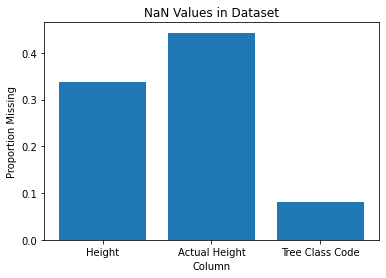

In [57]:
D = {u'Height':prop_height_missing, u'Actual Height': prop_actual_height_missing, u'Tree Class Code':prop_TREECLCD_missing}

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.title("NaN Values in Dataset")
plt.ylabel("Proportion Missing")
plt.xlabel("Column")
plt.show()

# sns.set(style="whitegrid")

In [60]:
trees['height check/'] = np.where(trees['ACTUALHT'] <= trees['HT'], 'smaller', 'bad')

In [61]:
trees.head()

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,CULTURALLY_KILLED_PNWRS,DIA_EST_PNWRS,GST_PNWRS,INC10YR_PNWRS,INC5YRHT_PNWRS,INC5YR_PNWRS,RING_COUNT_INNER_2INCHES_PNWRS,RING_COUNT_PNWRS,SNAG_DIS_CD_PNWRS,height check/
0,157582304010854,157499420010854,NaN,1972,1,1,3,90001,101,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad
1,157582305010854,157499420010854,NaN,1972,1,1,3,90001,101,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad
2,157582306010854,157499420010854,NaN,1972,1,1,3,90001,101,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad
3,157582307010854,157499420010854,NaN,1972,1,1,3,90001,101,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad
4,157582308010854,157499420010854,NaN,1972,1,1,3,90001,101,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad


In [62]:
trees['ACTUALHT'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: ACTUALHT, dtype: float32

In [63]:
trees['HT'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: HT, dtype: float32

In [64]:
trees_height_notna = trees[trees['HT'].notna()]